**Problem Statement:**

You are provided with the marketing spend data of an online advertising firm who
are looking to optimize their cost spend on ads while increasing their yield in
terms of marketing goals.

**Objective:**

Analyze the data and find actionable insights in the given data, come up with
strategies that use Data Science and AI techniques to optimize their marketing
spends for maximum yield.

**Tasks to be Performed:**
1. Preprocess the data for feature selection and feature engineering
2. Analyze the data for actionable insights by end to end Exploratory Data
Analysis
3. Perform statistical analysis both Descriptive and Inferential for higher level
insights
4. Devise a strategy and machine learning model that will solve the business
problem.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline
# tells python to actually display the graphs

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Executive Post Graduate Certification in Data Science & Artificial Intelligence – Evaluation Quiz/Assignment 1/online_advertising_performance_data.csv')

Online Advertising Performance Data

The dataset provides insights into the online advertising performance of a company, referred to as "Company X", from April 1, 2020, to June 30, 2020. The currency used for transactions is the US dollar.

Metrics:

Day: Date of the advertising campaign.

Campaign: A segmentation variable set by Company X to target specific groups of users with advertisements.

User Engagement: Indicates the level of engagement of users targeted by the advertising campaign.

Banner: Represents the size of the ad served by an advertising platform, referred to as "Advert Firm A".

Placement: Denotes the publisher space where the ad is served by "Advert Firm A", such as websites or apps.

Displays: The number of ads served by "Advert Firm A" during the campaign period.

Cost: The price paid by "Advert Firm A" to serve the ads to the publisher. It reflects the placement cost of the advertisements.

Clicks: The number of times users clicked on the advertisements during the campaign.

Revenue: The price paid by Company X to "Advert Firm A" for the clicks generated through the advertising campaign.

Post Click Conversions: Represents on-site transactions that occurred within the next 30 days after a user clicked on the advertisement.

Post Click Sales Amount: The monetary value of on-site transactions that occurred within the next 30 days after a user clicked on the advertisement.

Additional Information:

- Engagement: This variable signifies the type of users targeted by the campaign based on their behavior or characteristics.
  
- Banner: Defines the size of the advertisement or impression served to users.

- Placement: Specifies the website or app where the advertisement is being served, without disclosing the specific names of publishers.

# Describe Data

In [3]:
df.shape

(15408, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
dtypes: float64(5), int64(4

In [5]:
# let's view data
df.head()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Unnamed: 12,Unnamed: 13
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,NaN,NaN
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,NaN,NaN
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,NaN,NaN
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,NaN,NaN
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,NaN,NaN


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
month,15408,3,April,6269,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,15408.0,NaN,NaN,NaN,15.518886,8.740909,1.0,8.0,15.0,23.0,31.0
campaign_number,15408,3,camp 3,6917,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_engagement,15408,3,Medium,5489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
banner,15408,8,728 x 90,3142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
placement,14995,5,mno,4501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
displays,15408.0,NaN,NaN,NaN,15512.573014,44392.39289,0.0,78.0,1182.0,8960.25,455986.0
cost,15408.0,NaN,NaN,NaN,11.370262,45.369499,0.0,0.024,0.33985,2.536225,556.7048
clicks,15408.0,NaN,NaN,NaN,161.788487,728.276911,0.0,0.0,6.0,53.0,14566.0
revenue,15408.0,NaN,NaN,NaN,17.929943,96.781834,0.0,0.0,0.48395,3.8398,2096.2116


In [7]:
dups = df.duplicated()
print(f'Number of duplicate rows = {dups.sum()}')

df[dups]

Number of duplicate rows = 5


,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Unnamed: 12,Unnamed: 13
15403,April,1,camp 1,Low,160 x 600,ghi,16,0.0249,0,0.0000,0,0.0000,NaN,NaN
15404,April,1,camp 1,Low,160 x 600,mno,2234,0.4044,10,1.8347,3,101.7494,NaN,NaN
15405,June,29,camp 1,High,800 x 250,ghi,1,0.0157,0,0.0000,0,0.0000,NaN,NaN
15406,June,29,camp 1,High,800 x 250,mno,4,0.0123,0,0.0000,0,0.0000,NaN,NaN
15407,June,29,camp 3,High,240 x 400,def,1209,0.3184,2,0.1115,3,110.4224,NaN,NaN


Insights:
1. Dataset has 14 Columns and 15408 rows
2. categorical features: month, campaign_number, user_engagement, banner, placement

  numerical features: day, displays, cost, clicks, revenue, post_click_conversions, post_click_sales_amount, Unnamed: 12, Unnamed: 13
3. the dataset is provided for 3-months period
4. we can use features month and day to create a single feature date
5. There are 5 duplicate records
6. 'Unnamed: 12' and 'Unnamed: 13' don't have any data so I will drop these columns
7. only placement feature seems have missing values but we will have explore data if there are any anomalies or duplicates.
8. we can also use features revenue(The price paid by Company X to "Advert Firm A" for the clicks generated through the advertising campaign.), post_click_sales_amount(The monetary value of on-site transactions that occurred within the next 30 days after a user clicked on the advertisement.) to create ROAS (Return on Ad Spend) for Company X where ROAS  = post_click_sales_amount/revenue. But, we may have to be careful as in output of data.head() above we can see that some rows has revenue = 0.
9. we can also use post_click_conversions and clicks column to create new feature called conversion_rate where conversion_rate = post_click_conversions/clicks which will tell us how well clicks turn into purchases.
10. we can also use revenue and post_click_conversions columns to create new feature called cost_per_conversion where cost_per_conversion = revenue/post_click_conversions which will tell us how much company x pays per actual customer

# Data Pre-processing

In [8]:
df.drop(['Unnamed: 12', 'Unnamed: 13'], axis=1, inplace=True)

In [9]:
df.head()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
dups = df.duplicated()
print(f'Number of duplicate rows = {dups.sum()}')

df[dups]

Number of duplicate rows = 0


,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount


In [12]:
# let's check how many values are missing
df.isnull().sum()

,0
month,0
day,0
campaign_number,0
user_engagement,0
banner,0
placement,413
displays,0
cost,0
clicks,0
revenue,0


Only placement column have missing values

In [13]:
# let's check percentage of missing values in placement column
df['placement'].isnull().sum()/df.shape[0]*100

np.float64(2.681295851457508)

Only 2.7% of placement column's values are missing. Let's look at these rows.

In [14]:
df[df.placement.isnull()]

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount
893,April,5,camp 1,High,728 x 90,NaN,8,0.0152,0,0.0,0,0.0
951,April,5,camp 2,Low,728 x 90,NaN,2,0.0016,0,0.0,0,0.0
957,April,5,camp 2,Medium,728 x 90,NaN,4,0.0076,0,0.0,0,0.0
1034,April,5,camp 3,Medium,728 x 90,NaN,1,0.0008,0,0.0,0,0.0
1042,April,6,camp 1,High,160 x 600,NaN,1,0.0006,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15259,June,29,camp 3,Low,728 x 90,NaN,1,0.0008,0,0.0,0,0.0
15265,June,29,camp 3,Medium,728 x 90,NaN,8,0.0064,0,0.0,0,0.0
15323,June,30,camp 1,High,728 x 90,NaN,13,0.0104,0,0.0,0,0.0
15391,June,30,camp 3,High,728 x 90,NaN,1,0.0008,0,0.0,0,0.0


These missing values might be unknown category for publisher space. So, I will replace these values with 'unkown' category

In [15]:
df['placement'].fillna('unknown', inplace=True)

/tmp/ipython-input-15-1016454252.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['placement'].fillna('unknown', inplace=True)


In [16]:
df.isnull().sum()

,0
month,0
day,0
campaign_number,0
user_engagement,0
banner,0
placement,0
displays,0
cost,0
clicks,0
revenue,0


Now there are no missing values in dataset

Let's explore categorical variables

In [17]:
df.campaign_number.value_counts(normalize=True)

,proportion
campaign_number,
camp 3,0.449003
camp 1,0.446212
camp 2,0.104785


In [18]:
df.user_engagement.value_counts(normalize=True)

,proportion
user_engagement,
Medium,0.356359
Low,0.326755
High,0.316886


In [19]:
df.banner.value_counts(normalize=True)

,proportion
banner,
728 x 90,0.203986
300 x 250,0.183081
240 x 400,0.157372
670 x 90,0.152698
468 x 60,0.123288
160 x 600,0.117055
580 x 400,0.039343
800 x 250,0.023177


In [20]:
df.placement.value_counts(normalize=True)

,proportion
placement,
mno,0.292086
def,0.229631
ghi,0.226060
jkl,0.162566
abc,0.062845
unknown,0.026813


Feature Eningineering is Import aspect of data-preprocessing. A concept to derive new features from existing features to give better insights. Let's columns date and roas

In [21]:
# let's create date feature
df['date'] = pd.to_datetime(df['day'].astype(str) + ' ' + df['month'] + ' 2020')
df.head()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,date
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,2020-04-01
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,2020-04-01
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,2020-04-01
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,2020-04-01
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,2020-04-01


In [22]:
df.drop(['month', 'day'], axis=1, inplace=True)
df.head()

,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,date
0,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,2020-04-01
1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,2020-04-01
2,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,2020-04-01
3,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,2020-04-01
4,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,2020-04-01


In [23]:
# let's create roas column. if revenue is zero or post_click_sales_amount then roas is since either company x didn't pay any mony to advert firm a
# or company x didn't earn any money even after ads were published
df['roas'] = np.where((df['revenue'] == 0) | (df['post_click_sales_amount'] == 0), 0, df['post_click_sales_amount']/df['revenue'])

In [24]:
df[['roas', 'revenue', 'post_click_sales_amount']]

,roas,revenue,post_click_sales_amount
0,0.000000,0.0000,0.0000
1,68.082308,28.9717,1972.4602
2,86.180591,28.9771,2497.2636
3,74.746362,329.4518,24625.3234
4,0.000000,0.1834,0.0000
...,...,...,...
15398,30.838005,2.2513,69.4256
15399,0.000000,1.2386,0.0000
15400,0.000000,0.4504,0.0000
15401,0.000000,10.9785,0.0000


In [25]:
# let's create conversion_rate column
df['conversion_rate'] = np.where((df['post_click_conversions'] == 0) | (df['clicks'] == 0), 0, df['post_click_conversions']/df['clicks'])
df[['conversion_rate', 'post_click_conversions', 'clicks']]

,conversion_rate,post_click_conversions,clicks
0,0.000000,0,0
1,0.145570,23,158
2,0.493671,78,158
3,0.343541,617,1796
4,0.000000,0,1
...,...,...,...
15398,0.075000,3,40
15399,0.000000,0,22
15400,0.000000,0,8
15401,0.000000,0,195


In [26]:
# let's create cost_per_conversion column
df['cost_per_conversion'] = np.where((df['post_click_conversions'] == 0) | (df['revenue'] == 0), 0, df['revenue']/df['post_click_conversions'])
df[['cost_per_conversion', 'post_click_conversions', 'revenue']]

,cost_per_conversion,post_click_conversions,revenue
0,0.000000,0,0.0000
1,1.259639,23,28.9717
2,0.371501,78,28.9771
3,0.533958,617,329.4518
4,0.000000,0,0.1834
...,...,...,...
15398,0.750433,3,2.2513
15399,0.000000,0,1.2386
15400,0.000000,0,0.4504
15401,0.000000,0,10.9785


Let's describe data again

In [27]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
campaign_number,15403,3,camp 3,6916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_engagement,15403,3,Medium,5489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
banner,15403,8,728 x 90,3142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
placement,15403,6,mno,4499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
displays,15403.0,NaN,NaN,NaN,15517.383691,0.0,78.0,1182.0,8969.5,455986.0,44398.791785
cost,15403.0,NaN,NaN,NaN,11.373902,0.0,0.02405,0.3402,2.53715,556.7048,45.376413
clicks,15403.0,NaN,NaN,NaN,161.840226,0.0,0.0,6.0,53.0,14566.0,728.389447
revenue,15403.0,NaN,NaN,NaN,17.935637,0.0,0.0,0.4842,3.8418,2096.2116,96.797025
post_click_conversions,15403.0,NaN,NaN,NaN,42.313965,0.0,0.0,0.0,3.0,3369.0,213.719056
post_click_sales_amount,15403.0,NaN,NaN,NaN,2123.963529,0.0,0.0,0.0,163.50265,199930.318,10524.670688


numerical columns have very different variances. we can take care of that in data transformation step if it needs to be transformed

We have now cleaned the data, derived some new features and prepared the data as well. Now we will draw some insights from data based on our objective  using data visualization

Assumptions to be clarified from data using EDA:
1. is campaign number which is targeted for high user engagement also generating high roas compared to other comapaigns?
2. are high display numbers really generating high number of clicks?
3. are banners for which advert firm a pays high cost really generating high number of clicks?
4. are placements for which advert firm a pays high cost really generating high post_click_sales_amount?

# Data Visualization

**Let's verify asumption 1: is campaign number which is targeted for high user engagement also generating high roas compared to other comapaigns?**

<Axes: xlabel='user_engagement', ylabel='roas'>

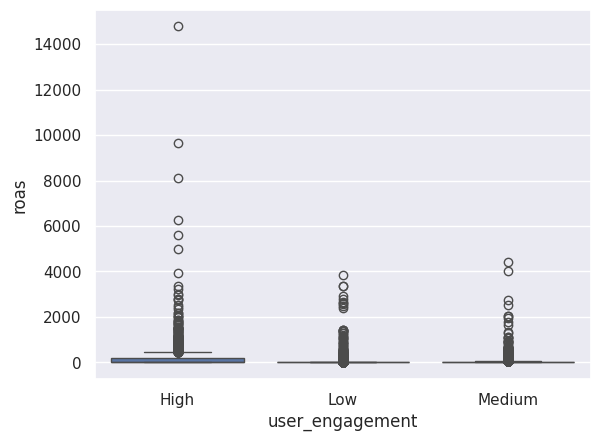

In [40]:
sns.boxplot(x='user_engagement', y='roas', data=df)

Insight: Campaigns targeting users with High engagement tend to generate higher ROAS, on average, compared to Low or Medium engagement groups.

<Axes: xlabel='campaign_number', ylabel='roas'>

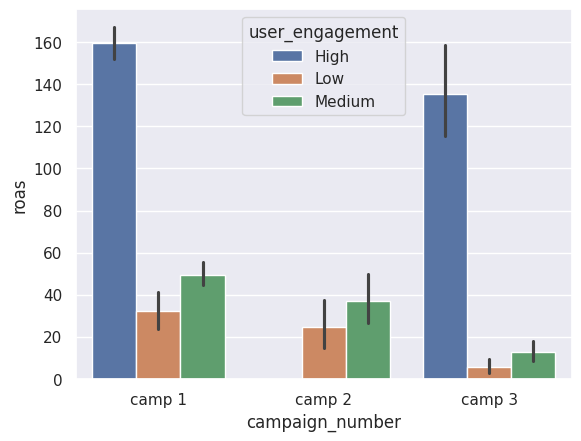

In [41]:
sns.barplot(x='campaign_number', y='roas', hue='user_engagement', data=df)

Insights:
1. Among all campaign and user engagement combinations, Campaign 1 targeting high engagement users achieves the highest average ROAS.
2. For all three campaigns, High > Medium > Low in terms of ROAS.
This supports the idea that targeting higher engagement users leads to better returns, regardless of campaign

In [42]:
df.groupby(['campaign_number', 'user_engagement'])['roas'].describe()

count        mean         std  min  25%  \
campaign_number user_engagement                                             
camp 1          High             2597.0  159.676358  202.016063  0.0  0.0   
                Low              2023.0   32.222540  210.320603  0.0  0.0   
                Medium           2253.0   49.446107  129.022713  0.0  0.0   
camp 2          Low               761.0   24.653635  153.931620  0.0  0.0   
                Medium            853.0   36.889700  178.642570  0.0  0.0   
camp 3          High             2284.0  135.279535  547.341602  0.0  0.0   
                Low              2249.0    5.724628   80.653629  0.0  0.0   
                Medium           2383.0   12.730213  120.139203  0.0  0.0   

                                        50%         75%           max  
campaign_number user_engagement                                        
camp 1          High             102.667499  239.701055   2004.474300  
                Low                0.000000    0.000000   3828.277984  
                Medium            11.001691   55.517729   2755.929889  
camp 2          Low                0.000000    5.162540   2803.044118  
                Medium            14.395320   34.835555   4035.031736  
camp 3          High               0.000000   98.769987  14774.938078  
                Low                0.000000    0.000000   2654.718431  
                Medium             0.000000    0.000000   4418.181648

In [43]:
df.groupby(['user_engagement'])['roas'].describe()

,count,mean,std,min,25%,50%,75%,max
user_engagement,,,,,,,,
High,4881.0,148.260184,402.506222,0.0,0.0,40.088372,179.873074,14774.938078
Low,5033.0,19.237493,156.247848,0.0,0.0,0.000000,0.000000,3828.277984
Medium,5489.0,31.554945,135.424695,0.0,0.0,0.000000,28.071307,4418.181648


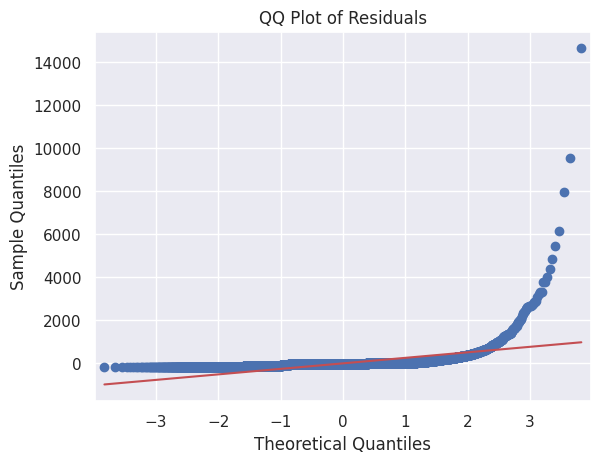

Shapiro-Wilk Test p-value: 1.2666430751631513e-119


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15403.
  res = hypotest_fun_out(*samples, **kwds)


In [44]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit Two-Way ANOVA model
model = ols('roas ~ C(campaign_number) + C(user_engagement) + C(campaign_number):C(user_engagement)', data=df).fit()

# QQ plot for residuals
sm.qqplot(model.resid, line='s')
plt.title("QQ Plot of Residuals")
plt.show()

# Shapiro-Wilk Test for normality
stat, p = stats.shapiro(model.resid)
print('Shapiro-Wilk Test p-value:', p)

The QQ plot of residuals shows significant deviation from the diagonal line, especially in the right tail (positive skewness). This means the residuals are not normally distributed i.e. we cannot use anova test to verify how interaction between campaign_number and user_engagement vs roas. Let's Trye log tranformtion on roas column.

In [45]:
df['log_roas'] = np.log1p(df['roas'])

In [46]:
df[['log_roas', 'roas']]

,log_roas,roas
0,0.000000,0.000000
1,4.235299,68.082308
2,4.467982,86.180591
3,4.327390,74.746362
4,0.000000,0.000000
...,...,...
15398,3.460661,30.838005
15399,0.000000,0.000000
15400,0.000000,0.000000
15401,0.000000,0.000000


/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


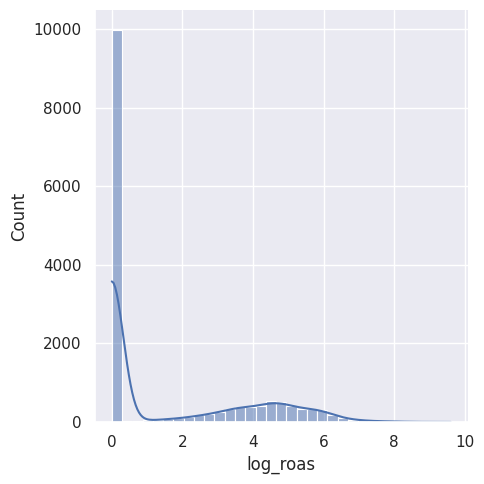

In [47]:
sns.displot(df['log_roas'], ax=axs[0], kde=True)

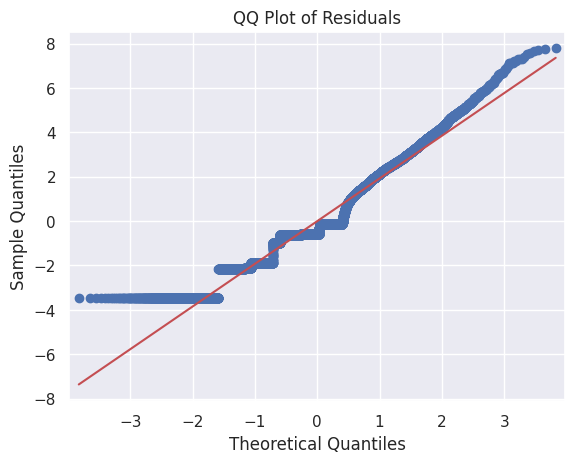

Shapiro-Wilk Test p-value: 1.9428288330410542e-55


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15403.
  res = hypotest_fun_out(*samples, **kwds)


In [48]:
# Fit Two-Way ANOVA model
model = ols('log_roas ~ C(campaign_number) + C(user_engagement) + C(campaign_number):C(user_engagement)', data=df).fit()

# QQ plot for residuals
sm.qqplot(model.resid, line='s')
plt.title("QQ Plot of Residuals")
plt.show()

# Shapiro-Wilk Test for normality
stat, p = stats.shapiro(model.resid)
print('Shapiro-Wilk Test p-value:', p)

**Insight:**

The QQ plot of residuals shows a clear deviation from the diagonal reference line, indicating that the residuals are not normally distributed. Additionally, the Shapiro-Wilk test confirms this violation with a very small p-value. As a result, the assumption of normality required for using the two-way ANOVA test is not satisfied, even after applying log transformation.

Therefore, ANOVA is not appropriate for statistically validating the interaction effect of campaign_number and user_engagement on log_roas.

However, data visualization (bar plot) suggests that the combination of Campaign 1 with High User Engagement consistently produces the highest ROAS, implying that this strategy is likely to yield the best marketing returns with optimized cost.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15403 entries, 0 to 15402
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   campaign_number          15403 non-null  object        
 1   user_engagement          15403 non-null  object        
 2   banner                   15403 non-null  object        
 3   placement                15403 non-null  object        
 4   displays                 15403 non-null  int64         
 5   cost                     15403 non-null  float64       
 6   clicks                   15403 non-null  int64         
 7   revenue                  15403 non-null  float64       
 8   post_click_conversions   15403 non-null  int64         
 9   post_click_sales_amount  15403 non-null  float64       
 10  date                     15403 non-null  datetime64[ns]
 11  roas                     15403 non-null  float64       
 12  conversion_rate          15403 non-nu

In [50]:
df.drop(['log_roas'], axis=1, inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15403 entries, 0 to 15402
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   campaign_number          15403 non-null  object        
 1   user_engagement          15403 non-null  object        
 2   banner                   15403 non-null  object        
 3   placement                15403 non-null  object        
 4   displays                 15403 non-null  int64         
 5   cost                     15403 non-null  float64       
 6   clicks                   15403 non-null  int64         
 7   revenue                  15403 non-null  float64       
 8   post_click_conversions   15403 non-null  int64         
 9   post_click_sales_amount  15403 non-null  float64       
 10  date                     15403 non-null  datetime64[ns]
 11  roas                     15403 non-null  float64       
 12  conversion_rate          15403 non-nu

**Let's verify Assumption 2: are high display numbers really generating high number of clicks?**

<Axes: xlabel='displays', ylabel='clicks'>

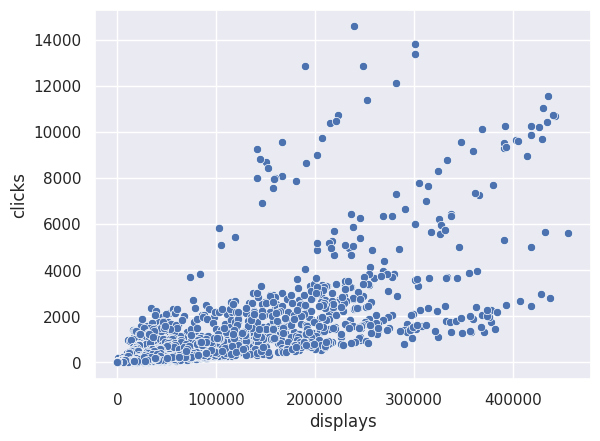

In [52]:
sns.scatterplot(x='displays', y='clicks', data=df)

<Axes: xlabel='displays', ylabel='clicks'>

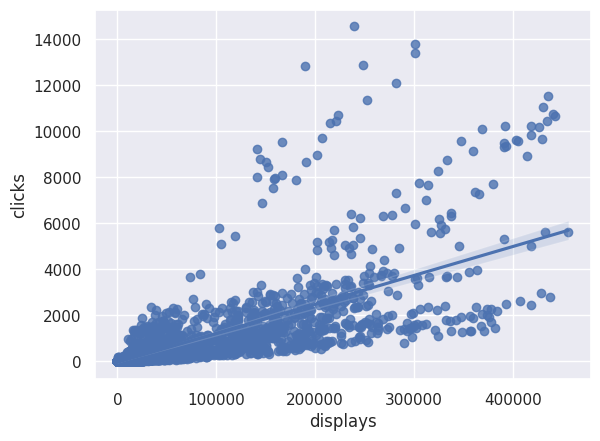

In [53]:
sns.regplot(x='displays', y='clicks', data=df)

In [54]:
df[['displays', 'clicks']].corr()

,displays,clicks
displays,1.000000,0.766965
clicks,0.766965,1.000000


**Insight:**

visual exploration through scatter plots and regression plots reveals a clear linear relationship. The Pearson correlation coefficient is 0.77, indicating a strong positive association. This implies that: Higher numbers of ad displays are strongly associated with higher click counts.

**Let's verify Assumption 3: are banners for which advert firm a pays high cost really generating high number of clicks?**

<Axes: xlabel='banner', ylabel='clicks'>

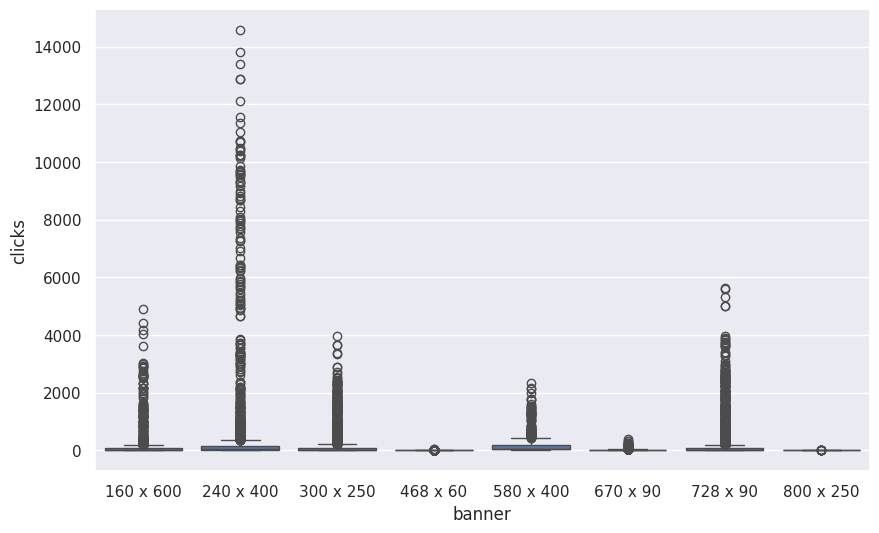

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='banner', y='clicks', data=df)

Shows that 240×400 has the widest range and highest median clicks, followed by 580×400 and 728×90.Other banners have relatively low and narrow click distributions.

<Axes: xlabel='cost', ylabel='clicks'>

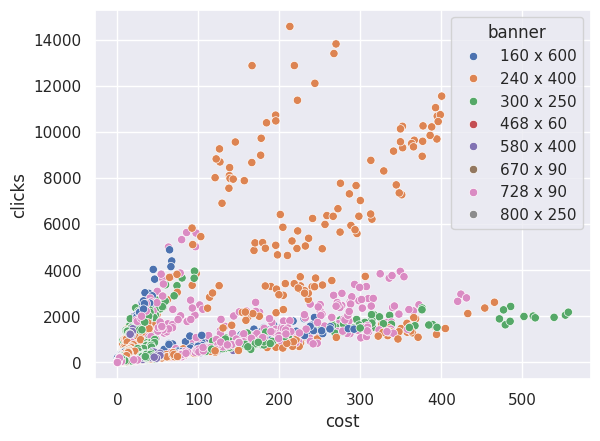

In [56]:
sns.scatterplot(x='cost', y='clicks', hue='banner', data=df)

Reveals a positive trend between cost and clicks. 240×400 stands out with high cost and high clicks. Some banners like 800×250 incur minimal cost and generate negligible clicks.

In [57]:
df.groupby(['banner'])[['clicks', 'cost']].mean()

,clicks,cost
banner,,
160 x 600,132.867443,9.714922
240 x 400,459.263201,23.273637
300 x 250,145.820567,12.566853
468 x 60,0.681938,0.101449
580 x 400,199.143564,14.816127
670 x 90,15.817602,1.623281
728 x 90,181.287715,16.814271
800 x 250,0.033613,0.007766


Confirms 240×400 gives the highest returns both in cost and clicks. 580×400 and 728×90 offer good click counts at slightly lower costs than 240×400.

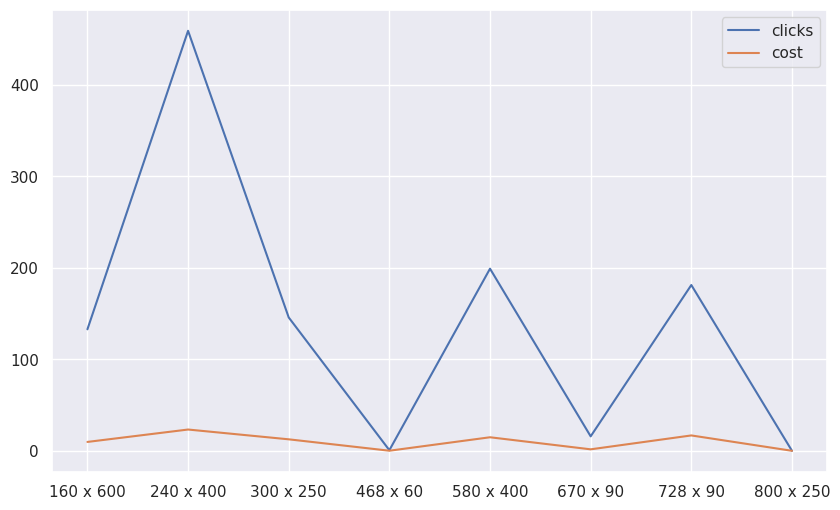

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(df.groupby(['banner'])[['clicks', 'cost']].mean())
plt.legend(['clicks', 'cost'])

Confirms cost and clicks move in similar direction across banners.

In [59]:
df[['cost', 'clicks']].corr()

,cost,clicks
cost,1.000000,0.672966
clicks,0.672966,1.000000


moderately strong positive linear relationship between cost and clicks.

**Insight:**

From the visual analysis, it is evident that banners with higher costs generally generate higher clicks. Among them, 240×400, 580×400, and 728×90 stand out as effective investments — yielding relatively high clicks for their associated costs. Thus, it is safe to spend on these banners for maximizing impact with budget in mind.

Let's verify assumption 4: are placements for which advert firm a pays high cost really generating high post_click_sales_amount?

<Axes: xlabel='placement', ylabel='post_click_sales_amount'>

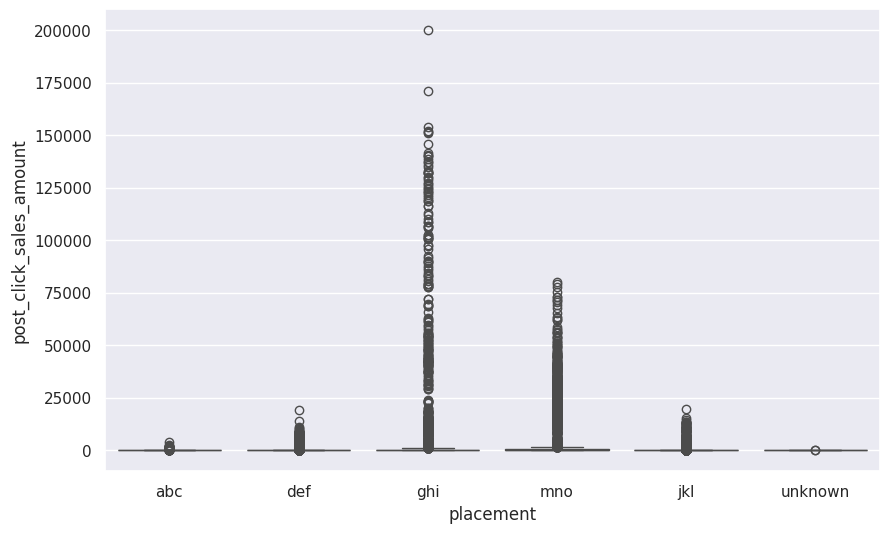

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='placement', y='post_click_sales_amount', data=df)

In [61]:
df.groupby(['placement'])[['post_click_sales_amount']].describe()

post_click_sales_amount                                       \
                            count         mean           std  min  25%   
placement                                                                
abc                         968.0    44.140008    252.106911  0.0  0.0   
def                        3537.0   446.081940   1371.793077  0.0  0.0   
ghi                        3482.0  4723.941567  18986.830171  0.0  0.0   
jkl                        2504.0   432.057310   1661.516532  0.0  0.0   
mno                        4499.0  3014.906798   9278.678279  0.0  0.0   
unknown                     413.0     0.458009      6.832540  0.0  0.0   

                                            
              50%         75%          max  
placement                                   
abc        0.0000    0.000000    3714.1688  
def        0.0000   77.768500   19131.0277  
ghi        0.0000  350.844175  199930.3180  
jkl        0.0000   21.116500   19741.4286  
mno        1.5506  590.789100   80311.2749  
unknown    0.0000    0.000000     121.3180

Shows that ghi has the widest range, but mno has highest median post_click_sales_amount.Other placements have relatively low and narrow click distributions.

<Axes: xlabel='cost', ylabel='post_click_sales_amount'>

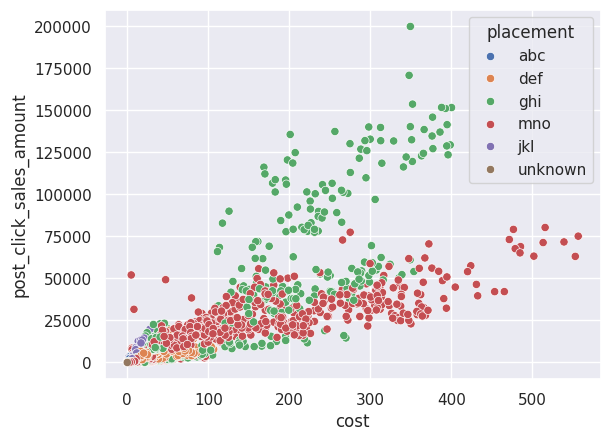

In [62]:
sns.scatterplot(x='cost', y='post_click_sales_amount', hue='placement', data=df)

Reveals a positive trend between cost and post_click_sales_amount. ghi stands out with high cost and post_click_sales_amount, followed by placement mno. Some placements like unknown incur minimal cost and generate negligible post_click_sales_amount.

In [63]:
df.groupby(['placement'])[['cost', 'post_click_sales_amount']].mean()

,cost,post_click_sales_amount
placement,,
abc,0.131587,44.140008
def,4.016872,446.081940
ghi,17.868633,4723.941567
jkl,1.449507,432.057310
mno,21.117191,3014.906798
unknown,0.006734,0.458009


Confirms ghi gives the highest returns both in cost and clicks, followed by mno. def and jkl offer good post_click_sales_amount at slightly lower costs than ghi and mno.

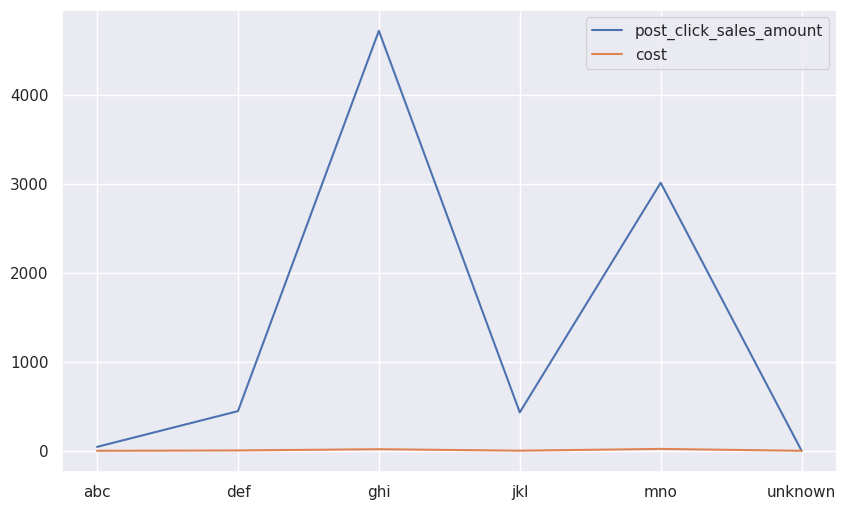

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(df.groupby(['placement'])[['post_click_sales_amount', 'cost']].mean())
plt.legend(['post_click_sales_amount', 'cost'])

Confirms our previous insight about ghi and mno

In [65]:
df[['cost', 'post_click_sales_amount']].corr()

,cost,post_click_sales_amount
cost,1.00000,0.84206
post_click_sales_amount,0.84206,1.00000


strong positive linear relationship between cost and post_click_sales_amount.

**Insight:**

From the visual analysis, it is evident that placements with higher costs generally generate higher post_click_sales_amount. Among them, ghi and mno stand out as effective investments — yielding relatively high post_click_sales_amount for their associated costs. Thus, it is safe to spend on these placements for maximizing impact with budget in mind.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15403 entries, 0 to 15402
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   campaign_number          15403 non-null  object        
 1   user_engagement          15403 non-null  object        
 2   banner                   15403 non-null  object        
 3   placement                15403 non-null  object        
 4   displays                 15403 non-null  int64         
 5   cost                     15403 non-null  float64       
 6   clicks                   15403 non-null  int64         
 7   revenue                  15403 non-null  float64       
 8   post_click_conversions   15403 non-null  int64         
 9   post_click_sales_amount  15403 non-null  float64       
 10  date                     15403 non-null  datetime64[ns]
 11  roas                     15403 non-null  float64       
 12  conversion_rate          15403 non-nu

# Data Preparation

In [67]:
# Since we are building a model to forecast post_click_sales_amount, I will drop derived features such as date, roas, conversion_rate, and cost_per_conversion,
# as they are computed from core features (cost, clicks, conversions, etc.). Including them can lead to multicollinearity
df_filtered = df.drop(columns=['roas', 'conversion_rate', 'cost_per_conversion', 'date'])

In [68]:
df_filtered.head()

,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount
0,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000
1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602
2,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636
3,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234
4,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000


In [69]:
# since after droping duplicates indeces might not be continous, I will reset index as well
df_filtered.reset_index(drop=True, inplace=True)

In [70]:
df_filtered.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
campaign_number,15403,3,camp 3,6916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_engagement,15403,3,Medium,5489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
banner,15403,8,728 x 90,3142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
placement,15403,6,mno,4499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
displays,15403.0,NaN,NaN,NaN,15517.383691,44398.791785,0.0,78.0,1182.0,8969.5,455986.0
cost,15403.0,NaN,NaN,NaN,11.373902,45.376413,0.0,0.02405,0.3402,2.53715,556.7048
clicks,15403.0,NaN,NaN,NaN,161.840226,728.389447,0.0,0.0,6.0,53.0,14566.0
revenue,15403.0,NaN,NaN,NaN,17.935637,96.797025,0.0,0.0,0.4842,3.8418,2096.2116
post_click_conversions,15403.0,NaN,NaN,NaN,42.313965,213.719056,0.0,0.0,0.0,3.0,3369.0
post_click_sales_amount,15403.0,NaN,NaN,NaN,2123.963529,10524.670688,0.0,0.0,0.0,163.50265,199930.318


In [71]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15403 entries, 0 to 15402
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   campaign_number          15403 non-null  object 
 1   user_engagement          15403 non-null  object 
 2   banner                   15403 non-null  object 
 3   placement                15403 non-null  object 
 4   displays                 15403 non-null  int64  
 5   cost                     15403 non-null  float64
 6   clicks                   15403 non-null  int64  
 7   revenue                  15403 non-null  float64
 8   post_click_conversions   15403 non-null  int64  
 9   post_click_sales_amount  15403 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 1.2+ MB


In [72]:
# let's encode categorical features as random forest model needs numerial values
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in df_filtered.columns:
  if df_filtered[col].dtype == 'object':
    le = LabelEncoder()
    df_filtered[col] = le.fit_transform(df_filtered[col])
    label_encoders[col] = le  # Store encoder for future use

In [73]:
df_filtered.head()

,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount
0,0,0,0,0,4,0.0060,0,0.0000,0,0.0000
1,0,0,0,1,20170,26.7824,158,28.9717,23,1972.4602
2,0,0,0,2,14701,27.6304,158,28.9771,78,2497.2636
3,0,0,0,4,171259,216.8750,1796,329.4518,617,24625.3234
4,0,1,0,1,552,0.0670,1,0.1834,0,0.0000


# Machine learning modeling

for predicting post_click_sales_amount, I will use random forest model

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

In [75]:
X = df_filtered.drop('post_click_sales_amount', axis=1)
y = df_filtered['post_click_sales_amount']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [77]:
rf_model = RandomForestRegressor(random_state=42)

In [81]:
param_grid = {
    'n_estimators':[301, 501],
    'max_depth':[7, 10],
    'min_samples_split':[120, 180],
    'min_samples_leaf':[40, 60],
    'max_features':[4, 7]
}

In [82]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)

In [83]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 7],
                         'min_samples_leaf': [40, 60],
                         'min_samples_split': [120, 180],
                         'n_estimators': [301, 501]})

In [85]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 7,
 'min_samples_leaf': 40,
 'min_samples_split': 120,
 'n_estimators': 301}

In [86]:
best_grid = grid_search.best_estimator_

In [84]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def performance_metrics(actual, predictions):

  print('R squared error: ', r2_score(actual, predictions))
  print('RMSE: ', np.sqrt(mean_squared_error(actual, predictions)))
  print('MAE: ', mean_absolute_error(actual, predictions))

In [87]:
y_train_pred = best_grid.predict(X_train)
y_test_pred = best_grid.predict(X_test)

In [88]:
print('Training Performance')
performance_metrics(y_train, y_train_pred)

Training Performance
R squared error:  0.9478717101081608
RMSE:  2388.058860262743
MAE:  376.34173445723974


In [89]:
print('Testing Performance')
performance_metrics(y_test, y_test_pred)

Testing Performance
R squared error:  0.9401418658048666
RMSE:  2611.498204153593
MAE:  414.39582006601375


The model generalizes well with a very small performance drop from train to test. The high R² scores suggest that the model explains ~94% of the variance in sales.

In [94]:
best_grid.feature_importances_

array([1.67170778e-05, 2.36282290e-04, 1.93743437e-03, 2.59073408e-05,
       4.65362663e-04, 1.65560703e-01, 2.10827817e-02, 4.98041104e-02,
       7.60870701e-01])

In [96]:
X_train.columns

Index(['campaign_number', 'user_engagement', 'banner', 'placement', 'displays',
       'cost', 'clicks', 'revenue', 'post_click_conversions'],
      dtype='object')

/tmp/ipython-input-98-549739227.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X_train.columns, y=best_grid.feature_importances_, palette='viridis')


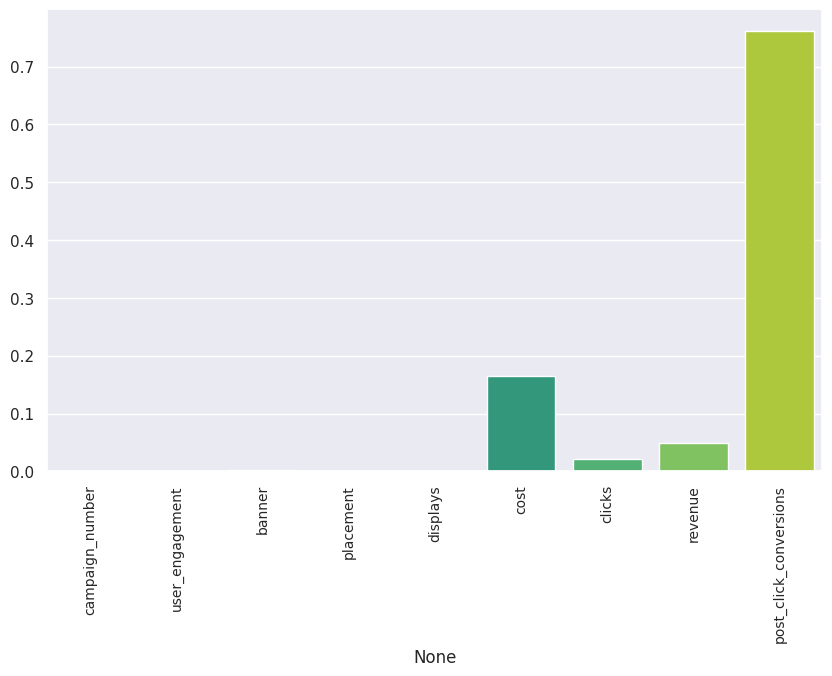

In [98]:
plt.figure(figsize=(10, 6))
sns.barplot(x=X_train.columns, y=best_grid.feature_importances_, palette='viridis')
plt.xticks(rotation=90, fontsize=10)
plt.show()

# Final Report

**Based on the insights driven from EDA, and model performance, Recommended Strategy for Company X:**
**1. Prioritize Campaign 1 when user engagement is high — this segment yields the best ROAS.**

**2. Invest in banners like 240×400, 580×400, and 728×90 — they’re efficient in click generation.**

**3. Focus budget on placements like ghi and mno for better sales conversion.**

**4. Use above mentioned random forest regression model to forecast expected sales for various cost configurations — enabling data-backed budget planning.**